# Evaluation of corrected precips

In [1]:
import xarray as xr
import numpy as np

## 1. Load datasets

In [2]:
erai_dir = '/Volumes/L4/ERAinterim/nc_daily/'
erai = xr.open_mfdataset(f'{erai_dir}/precip_ERAinterim_*_daily.nc', decode_times=False, combine='by_coords', chunks={'time': 24})

In [3]:
erai

<xarray.Dataset>
Dimensions:  (lat: 256, lon: 512, time: 14610)
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * time     (time) float64 2.493e+09 2.493e+09 ... 3.755e+09 3.755e+09
Data variables:
    precip   (time, lat, lon) float64 dask.array<chunksize=(24, 256, 512), meta=np.ndarray>

In [4]:
newp_dir = '/Volumes/L4/ERAinterim/corrected_precips/'
newp = xr.open_mfdataset(f'{newp_dir}/*.nc', decode_times=False, combine='by_coords', chunks={'time': 24})

In [5]:
newp

<xarray.Dataset>
Dimensions:  (lat: 256, lon: 512, time: 14610)
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * time     (time) float64 2.493e+09 2.493e+09 ... 3.755e+09 3.755e+09
Data variables:
    precip   (time, lat, lon) float64 dask.array<chunksize=(24, 256, 512), meta=np.ndarray>

In [6]:
gpcpdir = '/Users/raphael/STORAGE/GPCP2.3/'
gpcp = xr.open_dataset(gpcpdir + 'precip.mon.mean.nc')

In [7]:
gpcp

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 482)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-02-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         http://www.esrl.noaa.gov/psd/data/gridded/data.gpc...
    version:               V2.3
    Acknowledgement:       \n
    contributor_name:      Robert Adler    University of Maryland \nGeorge Hu...
    References:            http://www.esrl.noaa.gov/psd/data/gridded/data.gpc...
    dataset_title:         Global Precipitation Climatology Project (GPCP) Mo...
    description:           https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    data_comment:          Interim data covers 2019/01 through latest.

In [8]:
gpcpR = xr.open_dataset('/Volumes/L4/GPCP_v2.3_256x512.nc')

## 2. Start cluster

In [9]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:58517 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 17.18 GB


## 3. Zonal means

In [10]:
erai_zm = erai.mean(dim=['time', 'lon'])
erai_zm.load()

<xarray.Dataset>
Dimensions:  (lat: 256)
Coordinates:
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
Data variables:
    precip   (lat) float64 7.281e-06 7.354e-06 7.269e-06 ... 1.495e-06 1.662e-06

In [11]:
newp_zm = newp.mean(dim=['time', 'lon'])
newp_zm.load()

<xarray.Dataset>
Dimensions:  (lat: 256)
Coordinates:
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
Data variables:
    precip   (lat) float64 5.767e-06 5.767e-06 5.767e-06 ... 4.824e-06 4.824e-06

In [12]:
gpcp_zm = gpcp.mean(dim=['time', 'lon'])
gpcp_zm.load()

<xarray.Dataset>
Dimensions:   (lat: 72, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds  (nv) float32 178.75 181.25
    precip    (lat) float32 0.4140962 0.36566797 ... 0.47101226 0.49557227

In [13]:
gpcpR_zm = gpcpR.mean(dim=['time', 'lon'])
gpcpR_zm.load()

<xarray.Dataset>
Dimensions:  (lat: 256)
Coordinates:
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
Data variables:
    precip   (lat) float64 0.4956 0.4956 0.4956 0.4779 ... 0.4141 0.4141 0.4141

In [19]:
erai_zm.to_netcdf('zonal_mean_ERAinterim.nc')
newp_zm.to_netcdf('zonal_mean_BLEND.nc')
gpcp_zm.to_netcdf('zonal_mean_GPCP.nc')
gpcpR_zm.to_netcdf('zonal_mean_GPCP_regridded.nc')

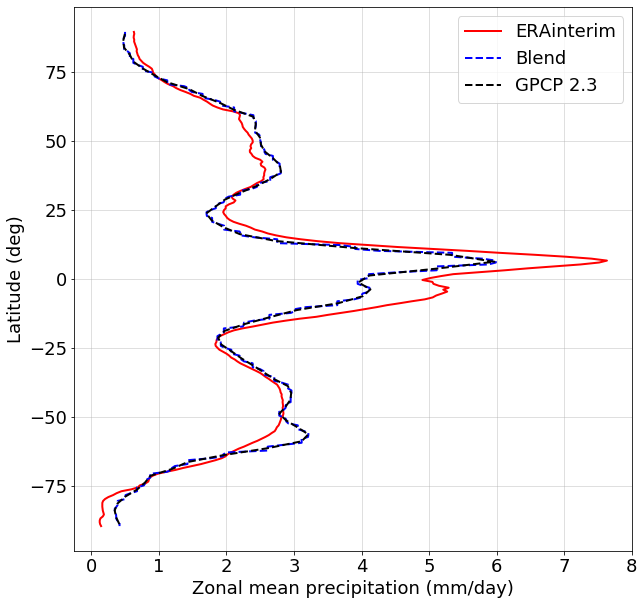

In [186]:
import matplotlib.pyplot as plt

plt.figure(figsize=[10,10])
plt.plot(86400 * erai_zm['precip'], erai_zm['lat'], 'r', linewidth=2, label='ERAinterim')
plt.plot(86400 * newp_zm['precip'], newp_zm['lat'], 'b--', linewidth=2, label='Blend')
plt.plot(gpcp_zm['precip'], gpcp_zm['lat'], 'k--', linewidth=2, label='GPCP 2.3')
plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(alpha=0.5)
plt.xlabel('Zonal mean precipitation (mm/day)', fontsize=18)
plt.ylabel('Latitude (deg)', fontsize=18)
plt.savefig('zonal_mean.png', bbox_inches='tight')

## 3.1 Total mean

In [99]:
# ERA-interim

lon = erai['lon'].values
lon_bnds = np.concatenate((np.array([lon[0] -0.5 * 0.7031]), 0.5 * (lon[:-1] + lon[1:]), np.array([lon[-1] + 0.5 * 0.7031])), axis=0)

lat = erai['lat'].values
lat_bnds = np.concatenate((np.array([90]), 0.5 * (lat[:-1] + lat[1:]), np.array([-90])), axis=0)

dx = lon_bnds[1:] - lon_bnds[:-1]
dy = - lat_bnds[1:] + lat_bnds[:-1]

lon2, lat2 = np.meshgrid(lon, lat)
dx2, dy2 = np.meshgrid(dx, dy)

area_erai = 4 * np.pi * np.pi *6378000 * 6378000 * dx2 * dy2 * np.cos(2*np.pi*lat2/360)
darea_erai = xr.DataArray(data=area_erai, dims=('lat', 'lon'))

# GPCP

lon = np.arange(1.25,360,2.5)
lat = np.arange(-88.75,90,2.5)
lon_b=np.arange(0,360+2.5,2.5)
lat_b=np.arange(-90,90+2.5,2.5)

dx = lon_b[1:] - lon_b[:-1]
dy = lat_b[1:] - lat_b[:-1]

lon2, lat2 = np.meshgrid(lon, lat)
dx2, dy2 = np.meshgrid(dx, dy)

area_gpcp = 4 * np.pi * np.pi *6378000 * 6378000 * dx2 * dy2 * np.cos(2*np.pi*lat2/360)
darea_gpcp = xr.DataArray(data=area_gpcp, dims=('lat', 'lon'))

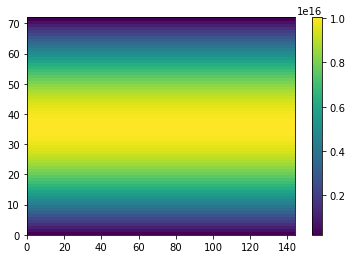

In [92]:
plt.pcolormesh(area_gpcp) ; plt.colorbar()

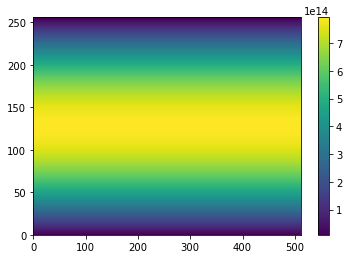

In [85]:
plt.pcolormesh(area_erai) ; plt.colorbar()

In [97]:
def global_mean(da, area):
    out = (da * area).sum(dim=['lon', 'lat']) / area.sum(dim=['lon', 'lat'])
    return out

In [101]:
gmean_erai = global_mean(erai['precip'], darea_erai)
gmean_gpcp = global_mean(gpcp['precip'], darea_gpcp)

In [103]:
gmean_erai.load()
gmean_gpcp.load()

<xarray.DataArray (time: 482)>
array([2.71203557, 2.73230386, 2.70049835, 2.61891252, 2.60920565,
       2.70935994, 2.67062812, 2.69622353, 2.71141878, 2.58581964,
       2.73230702, 2.58168325, 2.69508814, 2.63072059, 2.66970778,
       2.58367088, 2.62020611, 2.66548788, 2.65242573, 2.70247217,
       2.64205125, 2.64081513, 2.6188941 , 2.58636493, 2.71426377,
       2.68400081, 2.61587935, 2.62199916, 2.58841531, 2.68847441,
       2.71585008, 2.71238547, 2.71326661, 2.66918284, 2.75245049,
       2.70646674, 2.74227828, 2.67059483, 2.80519689, 2.69243409,
       2.67316573, 2.74297138, 2.68763668, 2.80650567, 2.67714744,
       2.64930056, 2.71233763, 2.74313717, 2.70215209, 2.67157781,
       2.64952894, 2.59608234, 2.64613669, 2.74538031, 2.75221903,
       2.76916523, 2.7021071 , 2.72564896, 2.70212802, 2.69697529,
       2.74308222, 2.72479888, 2.65655842, 2.6496428 , 2.6598428 ,
       2.75898281, 2.72805675, 2.74287005, 2.67705331, 2.76284515,
       2.72291589, 2.70138112, 2.67765984, 2.76610468, 2.69334655,
       2.60039908, 2.63522368, 2.67791611, 2.69383031, 2.78638517,
       2.69843038, 2.71541184, 2.7483091 , 2.67619354, 2.72275775,
       2.54554681, 2.71269696, 2.65007433, 2.61107528, 2.7174281 ,
       2.67821897, 2.70299687, 2.64305966, 2.55109153, 2.69779464,
       2.70314989, 2.72257485, 2.68955942, 2.64450991, 2.58801551,
       2.59081358, 2.67082623, 2.71210681, 2.73882869, 2.73879467,
       2.73501857, 2.75386503, 2.6407266 , 2.55148616, 2.69389731,
       2.81871195, 2.62939092, 2.7204637 , 2.70117454, 2.82567585,
       2.77494799, 2.76288587, 2.6421968 , 2.67773977, 2.67462341,
       2.77997373, 2.66497017, 2.52883701, 2.65206109, 2.55027507,
       2.66408651, 2.74593383, 2.69786295, 2.69870448, 2.63384304,
       2.75388788, 2.72385632, 2.71283745, 2.71869428, 2.78651605,
       2.68859212, 2.66912551, 2.69754852, 2.70511687, 2.68413425,
       2.62783519, 2.60054316, 2.72724375, 2.57861956, 2.67890907,
       2.6724124 , 2.71285726, 2.5367917 , 2.61817461, 2.74091827,
       2.63342311, 2.72016064, 2.61078834, 2.63456372, 2.62685898,
       2.49945783, 2.72259818, 2.73482825, 2.6151635 , 2.61784501,
       2.59091076, 2.64941052, 2.69001008, 2.63619686, 2.66412459,
       2.65679867, 2.69752358, 2.63526069, 2.68558617, 2.68421175,
       2.62166202, 2.55518673, 2.62741494, 2.7300772 , 2.71945069,
       2.68844042, 2.65798102, 2.77272171, 2.76664957, 2.78320199,
       2.6974909 , 2.60157014, 2.65287543, 2.6610852 , 2.62189119,
       2.77679948, 2.67649412, 2.66593423, 2.70064644, 2.53572647,
       2.60790525, 2.70882931, 2.65708849, 2.59584822, 2.67893955,
       2.67953805, 2.63486033, 2.74536391, 2.685533  , 2.73494229,
       2.72162627, 2.59792289, 2.73084762, 2.67661315, 2.74982592,
       2.7108771 , 2.80066835, 2.63174285, 2.61555833, 2.68198149,
       2.73250733, 2.70775829, 2.71757891, 2.67569536, 2.69763193,
       2.50543187, 2.73174807, 2.65724627, 2.68052234, 2.65987087,
       2.70860824, 2.66262096, 2.74508617, 2.77767135, 2.66955789,
       2.66608646, 2.66118994, 2.72482586, 2.7338648 , 2.7184809 ,
       2.7752397 , 2.71550494, 2.69024618, 2.73972418, 2.75317736,
       2.82649357, 2.74048692, 2.74163608, 2.66611112, 2.73519252,
       2.66081647, 2.68168824, 2.5588241 , 2.59208084, 2.64411417,
       2.63268514, 2.72967214, 2.69180063, 2.7029949 , 2.69286418,
       2.691928  , 2.65536529, 2.68978314, 2.64530642, 2.63280971,
       2.61608243, 2.68798961, 2.68907633, 2.71405552, 2.72742623,
       2.73067077, 2.68062105, 2.67162521, 2.68241807, 2.6167408 ,
       2.59286381, 2.6422512 , 2.64020489, 2.68325783, 2.73013952,
       2.75808398, 2.68383857, 2.66205083, 2.69016023, 2.72889066,
       2.66022956, 2.77456164, 2.70838948, 2.76308798, 2.61407997,
       2.68888134, 2.78937634, 2.70355739, 2.74019691, 2.69399077,
       2.59676492, 2.69298804, 2.68968526, 2.76129484, 2.72157189,
       2.76230483, 2.65626811, 2.69576771, 2.69479209, 2.71320716,
       2.7296368

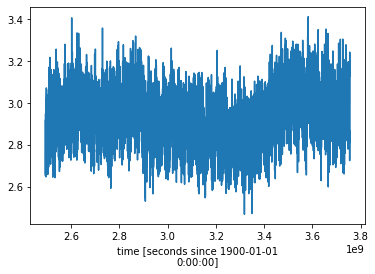

In [105]:
(86400 * gmean_erai).plot()

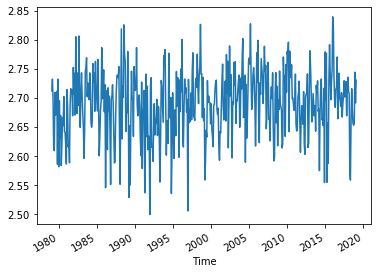

In [106]:
gmean_gpcp.plot()

In [107]:
gmean_newp = global_mean(newp['precip'], darea_erai)

In [108]:
gmean_newp.load()

<xarray.DataArray (time: 14610)>
array([3.22107069e-05, 3.09894374e-05, 3.09688394e-05, ...,
       3.41230229e-05, 3.37954883e-05, 3.31862385e-05])
Coordinates:
  * time     (time) float64 2.493e+09 2.493e+09 ... 3.755e+09 3.755e+09

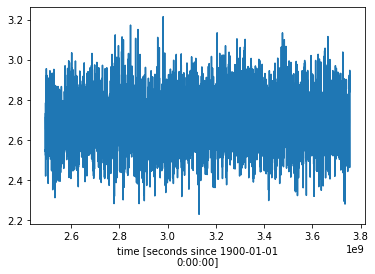

In [109]:
(86400 * gmean_newp).plot()

In [117]:
import cftime
gmean_erai['time'] = cftime.num2date(gmean_erai['time'], 'seconds since 1900-01-01 0:00:00')
gmean_newp['time'] = cftime.num2date(gmean_newp['time'], 'seconds since 1900-01-01 0:00:00')

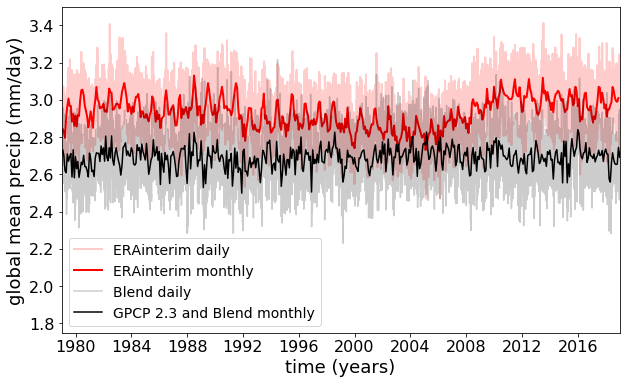

In [179]:
import pandas as pd
import datetime as dt
gmean_erai_monthly = gmean_erai.resample(time="1MS").mean()
#gmean_erai_monthly['time'] = pd.date_range(start='1/1/1979', periods=len(gmean_erai_monthly.values), freq='M')

plt.figure(figsize=[10,6])
plt.plot(gmean_erai.time, 86400 * gmean_erai.values,'r', alpha=0.2, linewidth=2, label='ERAinterim daily')
plt.plot(gmean_erai_monthly.time, 86400 * gmean_erai_monthly.values, 'r', linewidth=2, label='ERAinterim monthly' )
plt.plot(gmean_newp.time, 86400 * gmean_newp.values,'k', alpha=0.2, label='Blend daily')
plt.plot(gmean_gpcp.time, gmean_gpcp.values,'k', label='GPCP 2.3 and Blend monthly')

plt.axis([dt.datetime(1979,1,1), dt.datetime(2018,12,31),1.75 ,3.5])
plt.xlabel('time (years)', fontsize=18)
plt.ylabel('global mean precip (mm/day)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=3, fontsize=14)
plt.savefig('global_ts.png', bbox_inches='tight')

In [131]:
gmean_erai.time.

<xarray.DataArray (year: 40)>
array([3.35454506e-05, 3.41478487e-05, 3.42041506e-05, 3.44983582e-05,
       3.47509993e-05, 3.42806659e-05, 3.39060476e-05, 3.40358633e-05,
       3.39856639e-05, 3.45057694e-05, 3.42573113e-05, 3.44326869e-05,
       3.43615342e-05, 3.32331425e-05, 3.35244830e-05, 3.34502887e-05,
       3.36942578e-05, 3.34811431e-05, 3.35910801e-05, 3.35135663e-05,
       3.28919410e-05, 3.30904854e-05, 3.31607623e-05, 3.29272723e-05,
       3.25892172e-05, 3.27047040e-05, 3.24922152e-05, 3.30894466e-05,
       3.35279965e-05, 3.38809455e-05, 3.43200655e-05, 3.51034851e-05,
       3.50820461e-05, 3.49100440e-05, 3.47239729e-05, 3.47404114e-05,
       3.47060874e-05, 3.42740972e-05, 3.43941321e-05, 3.45959479e-05])
Coordinates:
  * year     (year) datetime64[ns] 1979-01-31 1979-02-28 ... 1982-04-30

In [240]:
(86400 * gmean_erai).mean() - gmean_gpcp.mean()

<xarray.DataArray ()>
array(2.93026427)

In [238]:
gmean_gpcp.mean()

<xarray.DataArray ()>
array(2.69005158)

## 4. Variances

In [ ]:
variance_erai = erai['precip'].var(dim='time')

In [ ]:
variance_erai.load()

In [ ]:
ds = xr.Dataset()
ds['var_pre'] = variance_erai
ds.to_netcdf('variance_precip_erai.nc')

In [31]:
ds = xr.open_dataset('variance_precip_erai.nc')

In [33]:
variance_erai = ds['var_pre']

In [ ]:
newp

In [20]:
variance_newp = newp['precip'].var(dim='time')

In [21]:
variance_newp.load()

<xarray.DataArray 'precip' (lat: 256, lon: 512)>
array([[1.28420113e-10, 1.29347820e-10, 1.29272778e-10, ...,
        1.29705347e-10, 1.29769537e-10, 1.29838968e-10],
       [1.27581306e-10, 1.28451983e-10, 1.28340042e-10, ...,
        1.28499142e-10, 1.28659696e-10, 1.28836384e-10],
       [1.34675103e-10, 1.35418414e-10, 1.35123067e-10, ...,
        1.35441035e-10, 1.35587318e-10, 1.35777376e-10],
       ...,
       [1.17139067e-10, 1.11966744e-10, 1.11929482e-10, ...,
        1.25547126e-10, 1.25797528e-10, 1.26064336e-10],
       [1.02225732e-10, 9.78218877e-11, 9.77601539e-11, ...,
        1.09717387e-10, 1.09812463e-10, 1.09911817e-10],
       [9.26228637e-11, 8.88554445e-11, 8.88448080e-11, ...,
        9.90966236e-11, 9.91888311e-11, 9.92819617e-11]])
Coordinates:
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46

In [23]:
ds = xr.Dataset()
ds['var_pre'] = variance_newp
ds.to_netcdf('variance_precip_newp.nc')

In [37]:
variance_gpcp = gpcp['precip'].var(dim='time')

In [38]:
variance_gpcp.load()

<xarray.DataArray 'precip' (lat: 72, lon: 144)>
array([[0.10582238, 0.10127826, 0.09752628, ..., 0.11201961, 0.11613942,
        0.11544518],
       [0.0618865 , 0.05909489, 0.05556611, ..., 0.06583744, 0.06560744,
        0.06422031],
       [0.04760443, 0.04380195, 0.03554832, ..., 0.0543393 , 0.05710585,
        0.05406222],
       ...,
       [0.13227777, 0.13201836, 0.13289541, ..., 0.13472804, 0.13591918,
        0.1314425 ],
       [0.1365793 , 0.1393635 , 0.14000295, ..., 0.14150865, 0.13858622,
        0.14037411],
       [0.19632332, 0.20798407, 0.19609554, ..., 0.20021577, 0.19511163,
        0.1976006 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75

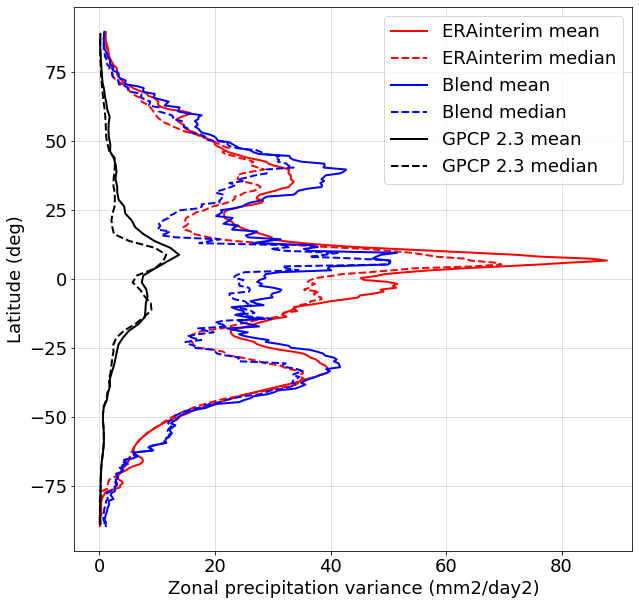

In [226]:
plt.figure(figsize=[10,10])

plt.plot(86400*86400*variance_erai.mean(dim='lon'), erai_zm['lat'], 'r', linewidth=2, label='ERAinterim mean')
plt.plot(86400*86400*variance_erai.median(dim='lon'), erai_zm['lat'], 'r--', linewidth=2, label='ERAinterim median')
plt.plot(86400*86400*variance_newp.mean(dim='lon'), newp_zm['lat'], 'b', linewidth=2, label='Blend mean')
plt.plot(86400*86400*variance_newp.median(dim='lon'), newp_zm['lat'], 'b--', linewidth=2, label='Blend median')
plt.plot(variance_gpcp.mean(dim='lon'), gpcp_zm['lat'], 'k', linewidth=2, label='GPCP 2.3 mean')
plt.plot(variance_gpcp.median(dim='lon'), gpcp_zm['lat'], 'k--', linewidth=2, label='GPCP 2.3 median')

plt.legend(fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid(alpha=0.5)
plt.xlabel('Zonal precipitation variance (mm2/day2)', fontsize=18)
plt.ylabel('Latitude (deg)', fontsize=18)
plt.savefig('zonal_variance.png', bbox_inches='tight')

In [192]:
#plt.figure(figsize=[10,10])
#plt.plot(86400*86400*variance_erai.mean(dim='lon'), erai_zm['lat'], 'k', label='ERAinterim')
#plt.plot(86400*86400*variance_newp.mean(dim='lon'), newp_zm['lat'], 'b--', label='blend')
#plt.plot(variance_gpcp.mean(dim='lon'), gpcp_zm['lat'], 'r--', label='GPCP 2.3')
#plt.legend()

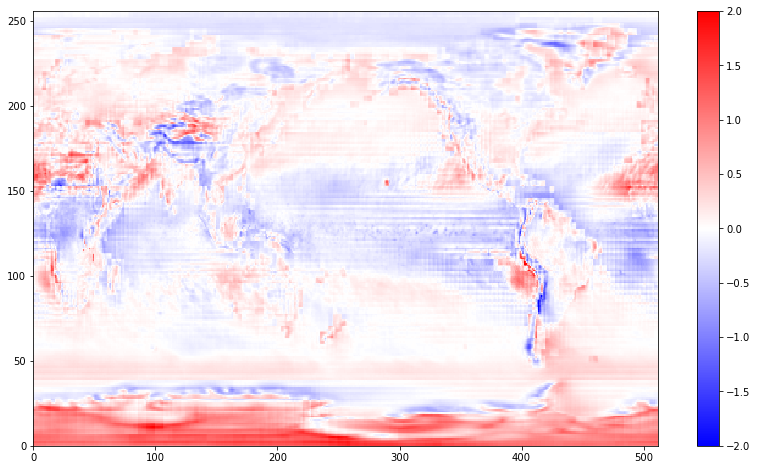

In [234]:
plt.figure(figsize=[14,8])
plt.pcolormesh(np.log10(variance_newp[::-1,:]/variance_erai[::-1,:]), vmin=-2, vmax=2, cmap='bwr')
plt.colorbar()

In [53]:
varplt_blend = np.log10(86400*86400*variance_newp)
#varplt_blend.plot(cmap='jet', figsize=[8,6], vmin=-3, vmax=3)

In [54]:
varplt_erai = np.log10(86400*86400*variance_erai)
#varplt.plot(cmap='jet', figsize=[8,6], vmin=-3, vmax=3)

In [55]:
varplt_gpcp = np.log10(variance_gpcp)
#varplt.plot(cmap='jet', figsize=[8,6], vmin=-3, vmax=3)

In [193]:
varplt_gpcp

<xarray.DataArray 'precip' (lat: 72, lon: 144)>
array([[-0.9754225 , -0.99448377, -1.0108783 , ..., -0.95070595,
        -0.9350203 , -0.9376242 ],
       [-1.2084041 , -1.2284501 , -1.25519   , ..., -1.1815271 ,
        -1.1830469 , -1.1923276 ],
       [-1.3223526 , -1.3585066 , -1.449181  , ..., -1.2648859 ,
        -1.2433194 , -1.267106  ],
       ...,
       [-0.87851316, -0.8793657 , -0.87649   , ..., -0.870542  ,
        -0.86671925, -0.8812642 ],
       [-0.8646151 , -0.85585093, -0.8538628 , ..., -0.849217  ,
        -0.85827994, -0.852713  ],
       [-0.7070281 , -0.68196994, -0.7075323 , ..., -0.6985017 ,
        -0.70971686, -0.7042117 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75

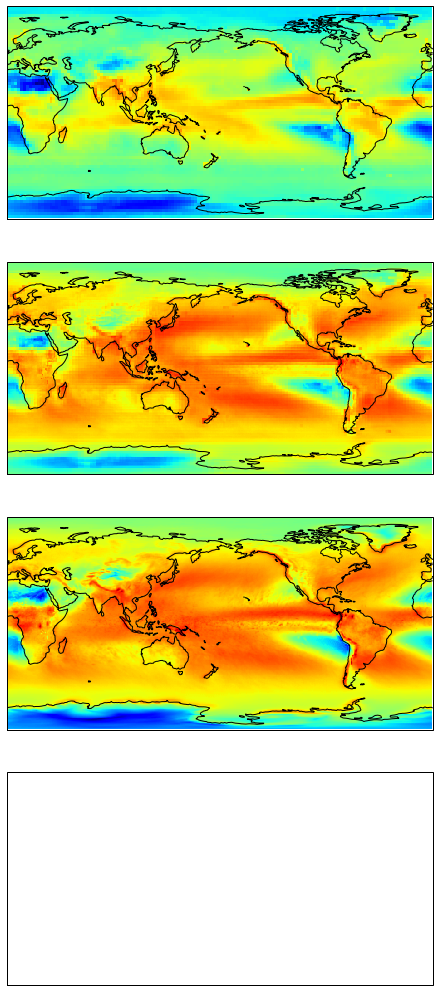

In [225]:
import cartopy.crs as ccrs

fig, axs = plt.subplots(nrows=4, sharex=True, figsize=(12, 18), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax0 = axs[0]
ax0.coastlines()
C0 = ax0.pcolormesh(varplt_gpcp.lon, varplt_gpcp.lat, varplt_gpcp, vmin=-3, vmax=3, cmap='jet', transform=ccrs.PlateCarree())

ax1 = axs[1]
ax1.coastlines()
C1 = ax1.pcolormesh(varplt_blend.lon, varplt_blend.lat, varplt_blend, vmin=-3, vmax=3, cmap='jet', transform=ccrs.PlateCarree())

ax2 = axs[2]
ax2.coastlines()
C2 = ax2.pcolormesh(varplt_erai.lon, varplt_erai.lat, varplt_erai, vmin=-3, vmax=3, cmap='jet', transform=ccrs.PlateCarree())

#ax3 = axs[3]
#plt.colorbar(C2, cax=ax3, orientation='horizontal')

In [265]:
data_newp = (86400 * newp['precip']).isel(time=31).sel(lon=slice(280,320), lat=slice(50,20))#.plot(vmin=0, vmax=60, cmap='gist_stern_r')

In [266]:
data_erai = (86400 * erai['precip']).isel(time=31).sel(lon=slice(280,320), lat=slice(50,20))#.plot(vmin=0, vmax=60, cmap='gist_stern_r')

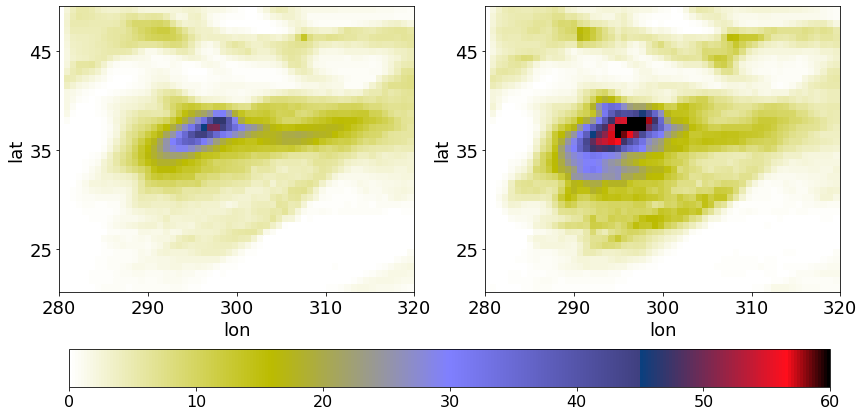

In [301]:

fig, axs = plt.subplots(ncols=2, figsize=[14,7])
ax0 = axs[0]
C0 = ax0.pcolormesh(data_erai.lon, data_erai.lat, data_erai.values.clip(min=0, max=60), vmin=0, vmax=60, cmap='gist_stern_r')
ax0.set_xticks([280, 290, 300, 310, 320])
ax0.set_xticklabels(labels=[280, 290, 300, 310, 320], fontsize=18)
ax0.set_yticks([25, 35, 45])
ax0.set_yticklabels(labels=[25, 35, 45], fontsize=18)
ax0.set_xlabel('lon', fontsize=18)
ax0.set_ylabel('lat', fontsize=18)
ax1 = axs[1]
C1 = ax1.pcolormesh(data_newp.lon, data_newp.lat, data_newp.values.clip(min=0, max=60), vmin=0, vmax=60, cmap='gist_stern_r')
ax1.set_xticks([280, 290, 300, 310, 320])
ax1.set_xticklabels(labels=[280, 290, 300, 310, 320], fontsize=18)
ax1.set_yticks([25, 35, 45])
ax1.set_yticklabels(labels=[25, 35, 45], fontsize=18)
ax1.set_xlabel('lon', fontsize=18)
ax1.set_ylabel('lat', fontsize=18)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.colorbar(C0)
cbar = fig.colorbar(C0, ax=axs, orientation='horizontal', fraction=.1)
cbar.ax.tick_params(labelsize=16)
plt.savefig('snapshot.png', bbox_inches='tight')